In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.metrics.plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import re
import os

In [213]:
m_h

,Unnamed: 0,Human_Genes
Mouse_Genes,,
Aars,1,AARS
Abcb6,2,ABCB6
Abcc5,3,ABCC5
Abcf1,4,ABCF1
Abcf3,5,ABCF3
...,...,...
Trp53,961,TP53
Trp53bp1,962,TP53BP1
Zfp131,963,ZNF131


In [220]:
m_h[m_h['Human_Genes']=='CHMP4A']

,Unnamed: 0,Human_Genes
Mouse_Genes,,


In [30]:
#gene check 
sub= pd.read_pickle("/Users/lidiayung/Downloads/plot_all_raw_sct_lincs_original.pkl")

In [201]:
sub.columns

'CHMP4A', 'ENOSF1', 'ZNF274', 'ZNF586'

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', name='Gene', length=31053)

In [207]:
sub['Chmp4b']

1       1.149904
3       2.830351
13      0.601161
14      1.349494
15      1.474752
          ...   
9548    3.648040
9549    0.976578
9555    3.500113
9561    0.000000
9564    0.000000
Name: Chmp4b, Length: 2508, dtype: float32

In [68]:
healthy_onc_stv=pd.read_pickle("/Users/lidiayung/Downloads/out_dir_sct_lincs/stv_lincs_sct_healthy_onc.pkl")

In [111]:
healthy_onc_stv

,n,s
Gene,,
Lypla1,-0.009645,-0.022205
Rrs1,0.045377,0.018496
Mcm3,0.072874,0.016193
Tram2,0.000256,0.000032
Zfp451,-0.006572,-0.002518
...,...,...
Casp7,0.013376,0.006266
Rab11fip2,-0.024094,-0.009914
Pax8,-0.000449,-0.000079


In [143]:
coef_survival=pd.read_csv("/Users/lidiayung/project/resource/perturbations/938_survival_coeffs_glmnet_blca.csv")

In [144]:
coef_survival.columns=['Genes','surv_coef']

In [145]:
coef_survival.set_index('Genes',inplace=True)

In [146]:
coef_survival

,surv_coef
Genes,
ABCB6,-3.044375
ABCF1,-0.639482
ABHD4,0.922074
ABHD6,-0.784907
ACD,0.230539
...,...
XBP1,2.018383
YKT6,0.143300
YME1L1,0.338965


In [174]:
merged_df = inv_DPD_stv.merge(healthy_onc_stv, left_index=True, right_index=True)

In [175]:
merged_df

,blca_inv,s_x,blca_onc,s_y
Gene,,,,
Lypla1,-0.004502,-0.027340,-0.009645,-0.022205
Rrs1,-0.006307,-0.002718,0.045377,0.018496
Mcm3,0.027984,0.001668,0.072874,0.016193
Tram2,-0.056115,-0.000504,0.000256,0.000032
Zfp451,-0.006106,-0.003532,-0.006572,-0.002518
...,...,...,...,...
Casp7,-0.003691,-0.010568,0.013376,0.006266
Rab11fip2,0.006111,-0.003737,-0.024094,-0.009914
Pax8,0.000000,0.000000,-0.000449,-0.000079


In [176]:
merged_df=merged_df.merge(m_h,left_index=True, right_index=True)

In [239]:
merged_df

,blca_inv,s_x,blca_onc,s_y,Unnamed: 0,Human_Genes
Gene,,,,,,
4933427D14Rik,-0.008525,-0.002775,0.015043,0.000653,938,KIAA0753
Aars,0.033517,-0.001512,0.022350,0.009260,1,AARS
Abcb6,-0.003545,-0.001587,0.010205,-0.001408,2,ABCB6
Abcc5,-0.015218,-0.051397,0.003614,0.006198,3,ABCC5
Abcf1,-0.033132,-0.037926,-0.019531,-0.007685,4,ABCF1
...,...,...,...,...,...,...
Zfp36,-0.005556,-0.135778,0.030402,-0.066220,934,ZFP36
Zfp451,-0.006106,-0.003532,-0.006572,-0.002518,965,ZNF451
Zmiz1,0.007280,-0.004923,-0.025032,0.010555,935,ZMIZ1


In [171]:
stvs_final =merged_df[['blca_inv','blca_onc','Human_Genes']]

KeyError: "['Human_Genes'] not in index"

In [240]:
stvs_final.loc['Zfp369']

KeyError: 'Zfp369'

In [125]:
stvs_final.reset_index(inplace=True)

In [128]:
stvs_final.set_index("Human_Genes")

,Gene,blca_inv,blca_onc
Human_Genes,,,
KIAA0753,4933427D14Rik,-0.008525,0.015043
AARS,Aars,0.033517,0.022350
ABCB6,Abcb6,-0.003545,0.010205
ABCC5,Abcc5,-0.015218,0.003614
ABCF1,Abcf1,-0.033132,-0.019531
...,...,...,...
ZFP36,Zfp36,-0.005556,0.030402
ZNF451,Zfp451,-0.006106,-0.006572
ZMIZ1,Zmiz1,0.007280,-0.025032


In [130]:
stvs_final.to_pickle("/Users/lidiayung/Downloads/m_h_stvs.pkl")

In [136]:
stvs_final.drop(columns='Gene',inplace=True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_3598/871338740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stvs_final.drop(columns='Gene',inplace=True)


In [179]:
stvs_final

,blca_inv,blca_onc
Human_Genes,,
KIAA0753,-0.008525,0.015043
AARS,0.033517,0.022350
ABCB6,-0.003545,0.010205
ABCC5,-0.015218,0.003614
ABCF1,-0.033132,-0.019531
...,...,...
ZFP36,-0.005556,0.030402
ZNF451,-0.006106,-0.006572
ZMIZ1,0.007280,-0.025032


In [166]:
list(coef_survival.index)

['ABCB6',
 'ABCF1',
 'ABHD4',
 'ABHD6',
 'ACD',
 'ACLY',
 'ADO',
 'AGL',
 'AKT1',
 'ALAS1',
 'ALDH7A1',
 'ALDOA',
 'ALDOC',
 'AMDHD2',
 'ANKRD10',
 'APBB2',
 'ARFIP2',
 'ARHGAP1',
 'ATF6',
 'ATMIN',
 'ATP1B1',
 'AURKA',
 'BAG3',
 'BCL7B',
 'BDH1',
 'BLMH',
 'BMP4',
 'BPHL',
 'BZW2',
 'C2CD2L',
 'CASK',
 'CASP3',
 'CAST',
 'CAT',
 'CCDC92',
 'CCNA1',
 'CCNH',
 'CDK5R1',
 'CDK6',
 'CDK7',
 'CDKN1B',
 'CENPE',
 'CEP57',
 'CERK',
 'CFLAR',
 'CHAC1',
 'CHMP4A',
 'CLTB',
 'CLTC',
 'CNDP2',
 'CNPY3',
 'COG4',
 'COG7',
 'COL4A1',
 'CREG1',
 'CRKL',
 'CTSD',
 'CTTN',
 'DCK',
 'DCUN1D4',
 'DECR1',
 'DFFB',
 'DHRS7',
 'DHX29',
 'DLD',
 'DNAJC15',
 'DNM1L',
 'DNTTIP2',
 'DSG2',
 'DUSP22',
 'DUSP3',
 'DUSP4',
 'DUSP6',
 'EBNA1BP2',
 'ECH1',
 'EDN1',
 'EGFR',
 'ELAC2',
 'ELAVL1',
 'EML3',
 'ENOSF1',
 'EPHA3',
 'EPN2',
 'ERBB2',
 'ETFB',
 'ETS1',
 'ETV1',
 'FAH',
 'FAM57A',
 'FASTKD5',
 'FBXL12',
 'FBXO11',
 'FBXO7',
 'FCHO1',
 'FHL2',
 'FKBP4',
 'FOS',
 'FOSL1',
 'FOXO4',
 'FSD1',
 'FYN',
 'FZD7',
 

In [169]:
non_overlapping_in_coef_survival

['CHMP4A', 'ENOSF1', 'ZNF274', 'ZNF586']

In [231]:
full=stvs_final.merge(coef_survival,left_index=True, right_index=True,how='outer')

In [232]:
full = full.fillna(0)


In [233]:
full

,blca_inv,blca_onc,surv_coef
AARS,0.033517,0.022350,0.000000
ABCB6,-0.003545,0.010205,-3.044375
ABCC5,-0.015218,0.003614,0.000000
ABCF1,-0.033132,-0.019531,-0.639482
ABCF3,0.027963,-0.021409,0.000000
...,...,...,...
ZNF274,0.000000,0.000000,-0.440133
ZNF318,-0.003717,-0.031007,0.000000
ZNF451,-0.006106,-0.006572,0.000000
ZNF586,0.000000,0.000000,0.077302


In [238]:
full.to_pickle("/Users/lidiayung/Downloads/full_stvs.pkl")

In [237]:
full.loc['ZNF586']

blca_inv     0.000000
blca_onc     0.000000
surv_coef    0.077302
Name: ZNF586, dtype: float64

In [79]:
m_h=pd.read_csv("/Users/lidiayung/Downloads/m_h_convertion.csv",index_col=['Mouse_Genes'])

In [80]:
m_h

,Unnamed: 0,Human_Genes
Mouse_Genes,,
Aars,1,AARS
Abcb6,2,ABCB6
Abcc5,3,ABCC5
Abcf1,4,ABCF1
Abcf3,5,ABCF3
...,...,...
Trp53,961,TP53
Trp53bp1,962,TP53BP1
Zfp131,963,ZNF131


In [69]:
healthy_onc_stv

,n,s
Gene,,
Lypla1,-0.009645,-0.022205
Rrs1,0.045377,0.018496
Mcm3,0.072874,0.016193
Tram2,0.000256,0.000032
Zfp451,-0.006572,-0.002518
...,...,...
Casp7,0.013376,0.006266
Rab11fip2,-0.024094,-0.009914
Pax8,-0.000449,-0.000079


In [21]:
healthy_onc_DPD

,DPD_onc
index,
GSM5288672_0,-3.732540
GSM5288672_1,-4.504470
GSM5288672_2,-1.013785
GSM5288672_3,-4.892912
GSM5288672_4,-5.002293
...,...
GSM5288671_9597,1.870853
GSM5288671_9598,2.527353
GSM5288671_9601,7.686562


## Visualisation of resulting DPDs

In [21]:
from sklearn.metrics import confusion_matrix


In [3]:
DPD_all =pd.read_pickle("/Users/lidiayung/Downloads/lincs_dotproduct.pkl")

In [4]:
DPD_all.reset_index(inplace=True)
DPD_all['Type']= DPD_all['index'].str[0:10]
DPD_all['Description']=0
DPD_all

,index,onc,inv,Type,Description
0,GSM5288672_0,-1.495758,-3.483759,GSM5288672,0
1,GSM5288672_1,-4.419111,-3.996016,GSM5288672,0
2,GSM5288672_2,-1.691239,-2.857917,GSM5288672,0
3,GSM5288672_3,-3.552145,-3.263836,GSM5288672,0
4,GSM5288672_4,-5.152509,-2.456884,GSM5288672,0
...,...,...,...,...,...
12912,GSM5288671_3948,4.439115,-0.648607,GSM5288671,0
12913,GSM5288671_3949,0.514014,-0.297562,GSM5288671,0
12914,GSM5288671_3950,6.727825,-0.314999,GSM5288671,0
12915,GSM5288671_3951,2.437929,0.512277,GSM5288671,0


In [5]:
DPD_all.loc[DPD_all['Type'].isin(["GSM5288671", "GSM5288670"]), 'Description'] = "MIBC"
DPD_all.loc[DPD_all['Type'].isin(["GSM5288668", "GSM5288669"]), 'Description'] = "NMIBC"

DPD_all.loc[~DPD_all['Description'].isin(["MIBC", "NMIBC"]), 'Description'] = "Healthy"


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_11076/1814810640.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MIBC' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DPD_all.loc[DPD_all['Type'].isin(["GSM5288671", "GSM5288670"]), 'Description'] = "MIBC"


In [6]:
DPD_all.set_index(['index'],inplace=True)

In [193]:
#DPD_all.loc[~DPD_all['Type'].isin(["GSM5288671", "GSM5288670","GSM5288669","GSM5288668",
#                                  "GSM5288674"]), 'Type'] = "GSM5288672"


In [7]:
DPD_all

,onc,inv,Type,Description
index,,,,
GSM5288672_0,-1.495758,-3.483759,GSM5288672,Healthy
GSM5288672_1,-4.419111,-3.996016,GSM5288672,Healthy
GSM5288672_2,-1.691239,-2.857917,GSM5288672,Healthy
GSM5288672_3,-3.552145,-3.263836,GSM5288672,Healthy
GSM5288672_4,-5.152509,-2.456884,GSM5288672,Healthy
...,...,...,...,...
GSM5288671_3948,4.439115,-0.648607,GSM5288671,MIBC
GSM5288671_3949,0.514014,-0.297562,GSM5288671,MIBC
GSM5288671_3950,6.727825,-0.314999,GSM5288671,MIBC


In [13]:
DPD_all['Predicted_label']=0

In [32]:
# Assign predicted labels based on conditions
DPD_all.loc[DPD_all['onc'] <= 0, 'Predicted_label'] = 'Healthy'
DPD_all.loc[(DPD_all['inv'] > 0) & (DPD_all['onc'] > 0), 'Predicted_label'] = 'MIBC'
DPD_all.loc[(DPD_all['inv'] < 0) & (DPD_all['onc'] > 0), 'Predicted_label'] = 'NMIBC'

In [36]:
DPD_all

,onc,inv,Type,Description,Predicted_label
index,,,,,
GSM5288672_0,-1.495758,-3.483759,GSM5288672,Healthy,Healthy
GSM5288672_1,-4.419111,-3.996016,GSM5288672,Healthy,Healthy
GSM5288672_2,-1.691239,-2.857917,GSM5288672,Healthy,Healthy
GSM5288672_3,-3.552145,-3.263836,GSM5288672,Healthy,Healthy
GSM5288672_4,-5.152509,-2.456884,GSM5288672,Healthy,Healthy
...,...,...,...,...,...
GSM5288671_3948,4.439115,-0.648607,GSM5288671,MIBC,NMIBC
GSM5288671_3949,0.514014,-0.297562,GSM5288671,MIBC,NMIBC
GSM5288671_3950,6.727825,-0.314999,GSM5288671,MIBC,NMIBC


In [37]:

# Generate confusion matrix
conf_matrix = confusion_matrix(DPD_all['Description'], DPD_all['Predicted_label'])

row_names = ['Healthy', 'MIBC', 'NMIBC']
col_names = ['Predicted Healthy', 'Predicted MIBC', 'Predicted NMIBC']

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=row_names, columns=col_names)

print("Confusion Matrix:")
print(conf_matrix_df)


Confusion Matrix:
         Predicted Healthy  Predicted MIBC  Predicted NMIBC
Healthy               3104               0                0
MIBC                     1            3300             3160
NMIBC                    0               0             3352


In [38]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels)

NameError: name 'true_labels' is not defined

In [199]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96      9813
        True       0.90      0.83      0.86      3104

    accuracy                           0.94     12917
   macro avg       0.92      0.90      0.91     12917
weighted avg       0.93      0.94      0.93     12917



In [39]:
# Confusion matrix data
conf_matrix_data = conf_matrix

# True positives, false positives, and false negatives for each class
TP = np.diag(conf_matrix_data)
FP = conf_matrix_data.sum(axis=0) - TP
FN = conf_matrix_data.sum(axis=1) - TP

# Precision, recall, and F1-score for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Overall accuracy
accuracy = np.sum(TP) / np.sum(conf_matrix_data)

# Print metrics
print("Precision:", f"{np.round(precision,2)}")
print("Recall:", f"{np.round(recall,2)}")
print("F1-score:",  f"{np.round(f1_score,2)}")
print("Overall accuracy:", f"{np.round(accuracy,2)}")


Precision: [1.   1.   0.51]
Recall: [1.   0.51 1.  ]
F1-score: [1.   0.68 0.68]
Overall accuracy: 0.76


In [201]:
print("Precision:", f"{np.round(precision,2)}")
print("Recall:", f"{np.round(recall,2)}")
print("F1-score:",  f"{np.round(f1_score,2)}")
print("Overall accuracy:", f"{np.round(accuracy,2)}")

Precision: [0.9  0.89 0.85]
Recall: [0.83 0.93 0.82]
F1-score: [0.86 0.91 0.84]
Overall accuracy: 0.88


In [134]:
#MIBC
print(f"MIBC labels count: {len(DPD_all[DPD_all['Description']=='MIBC'])}")
print(f"final result counts:{len(DPD_all[(DPD_all['DPD_test'] > 0) & (DPD_all['DPD_onc'] > 0)])}")


MIBC labels count: 6461
final result counts:6798


In [52]:
1590/3352

0.4743436754176611

8713

In [55]:
8713/6461

1.3485528555951092

In [9]:
import seaborn as sns

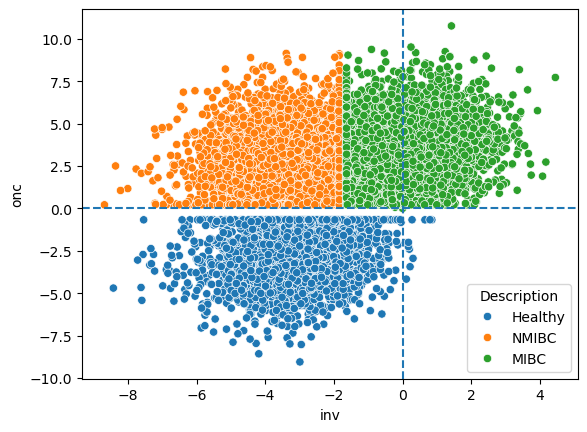

In [11]:

sns.scatterplot(DPD_all,x='inv',y='onc',hue='Description')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)

Text(0.5, 0, 'DPD_N/MIBC')

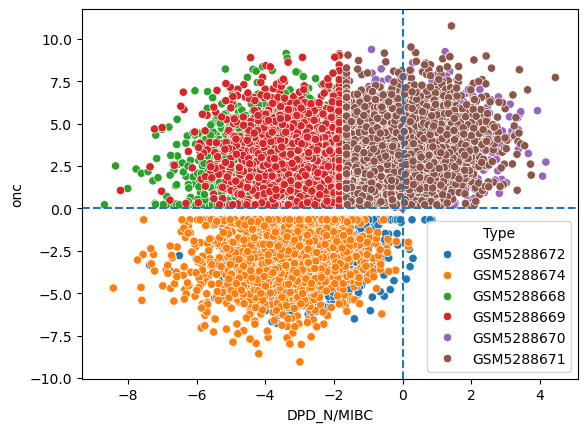

In [12]:
sns.scatterplot(DPD_all,x='inv',y='onc',hue='Type')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.xlabel('DPD_N/MIBC')
#plt.legend(loc="lower right",bbox_to_anchor=(1.15,0))
#plt.legend(title='Type', labels=['Healthy', 'm_NMIBC','f_NMIBC','m_MIBC','f_MIBC'])
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs.png",dpi=300)